# Process Bursts

This notebook computes the burst drift for all bursts using the method show in `BurstDrift.ipynb`

In [1]:
#!/usr/bin/python3

from __future__ import division
import math
import os
import sys
import time
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit
from math import log10
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import pi as nombrepi
from scipy import signal, ndimage
from tqdm import tqdm
from matplotlib import colors as mcolors
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd

bursts = pd.read_csv('bursts.csv')

# Gaussian 2d Fit Stuff
# Source: https://gist.github.com/andrewgiessel/6122739
# Source: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m
def gaussian(height, center_x, center_y, width_x, width_y, rotation):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)

    rotation = np.deg2rad(rotation)
    center_x_old = center_x
    center_x = center_x * np.cos(rotation) - center_y * np.sin(rotation)
    center_y = center_x_old * np.sin(rotation) + center_y * np.cos(rotation)

    def rotgauss(x,y):
        xp = x * np.cos(rotation) - y * np.sin(rotation)
        yp = x * np.sin(rotation) + y * np.cos(rotation)
        g = height*np.exp( -(((center_x-xp)/width_x)**2  +((center_y-yp)/width_y)**2)/2.  )
        return g
    return rotgauss

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y, 2.0

def twoD_Gaussian(point, amplitude, xo, yo, sigma_x, sigma_y, theta):
    x, y = point
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = (np.sin(2*theta))/(2*sigma_x**2) - (np.sin(2*theta))/(2*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*np.exp( - a*((x-xo)**2) - b*(x-xo)*(y-yo) - c*((y-yo)**2))
    return g.ravel()

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) - data)
    p, success = scipy.optimize.leastsq(errorfunction, params)
    return p, success

def fitgaussiannlsq(data):
    # use curve-fit (non-linear leastsq)
    x = range(0, 1023); y = range(0, 1023)
    x, y = np.meshgrid(x, y)
    params = moments(data)#+ (0.,)
    popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), corr.ravel(), p0=params)
    return popt, pcov

  0%|          | 0/16 [00:00<?, ?it/s]

processing 01_puppi_57747_C0531+33_0558_5.dm559.72.calibP.RM.DD.ASCII
processing 02_puppi_57747_C0531+33_0558_1183.dm559.72.calibP.RM.DD.ASCII
processing 03_puppi_57747_C0531+33_0558_1202.dm559.72.calibP.RM.DD.ASCII
processing 04_puppi_57747_C0531+33_0558_25437.dm559.72.calibP.RM.DD.ASCII
processing 05_puppi_57747_C0531+33_0558_3683.dm559.72.calibP.RM.DD.ASCII
processing 06_puppi_57747_C0531+33_0558_3687.dm559.72.calibP.RM.DD.ASCII
processing 07_puppi_57747_C0531+33_0558_3688.dm559.72.calibP.RM.DD.ASCII
processing 08_puppi_57747_C0531+33_0558_3689.dm559.72.calibP.RM.DD.ASCII
processing 09_puppi_57747_C0531+33_0558_3690.dm559.72.calibP.RM.DD.ASCII
processing 10_puppi_57747_C0531+33_0558_12568.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [   5.91208449  511.00000037  511.00000007 -130.60561575  -47.07411294
   -1.39244814]
parameter 1sigma: [0.07228006 0.63302199 1.57330265 1.59534473 0.57523675 0.00716349]
drift error: 1.1285807128066854
saved figur

 62%|██████▎   | 10/16 [10:18<06:10, 61.82s/it]

processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [ 12.00962927 511.00000018 510.99999976 182.57011239  39.81075769
   1.71801834]
parameter 1sigma: [0.06718783 0.26611131 1.0105408  1.02512666 0.2224322  0.00180972]
drift error: 12.832904904019012
saved figures/burst_11_figure.png


 69%|██████▉   | 11/16 [20:38<19:06, 229.28s/it]

processing 12_puppi_57748_C0531+33_0594_48.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [ 83.6186647  510.99999999 511.00000004 137.48322035  28.82238584
   4.86191343]
parameter 1sigma: [0.08600473 0.03609572 0.13989045 0.14140131 0.02964355 0.00031895]
drift error: 2.193127945731207
saved figures/burst_12_figure.png


 75%|███████▌  | 12/16 [31:16<23:28, 352.09s/it]

processing 13_puppi_57748_C0531+33_0594_49.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [937.89834228 511.         511.         141.35401376  40.66982088
   1.73586563]
parameter 1sigma: [2.65759992e-01 1.31352506e-02 3.95537448e-02 4.00544093e-02
 1.15240500e-02 1.25703405e-04]
drift error: 0.7103667304803064
saved figures/burst_13_figure.png


 81%|████████▏ | 13/16 [41:48<21:48, 436.04s/it]

processing 14_puppi_57748_C0531+33_0594_50.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [334.27050722 511.         510.99999998 159.61307367  11.69634805
   4.75691681]
parameter 1sigma: [1.49538780e-01 6.11711570e-03 7.13290037e-02 7.14424172e-02
 5.23183738e-03 4.66085819e-05]
drift error: 3.589301050111523
saved figures/burst_14_figure.png


 88%|████████▊ | 14/16 [52:19<16:28, 494.43s/it]

processing 15_puppi_57748_C0531+33_0594_1269.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [531.91988788 511.         511.          65.08197489  47.78921036
   2.00460266]
parameter 1sigma: [0.25326592 0.02441218 0.02970171 0.03098981 0.02275473 0.00107286]
drift error: 0.9265904079652391
saved figures/burst_15_figure.png


 94%|█████████▍| 15/16 [1:02:40<08:52, 532.42s/it]

processing 16_puppi_57772_C0531+33_0007_2695.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
solution nlsq: [2.62400985e+03 5.11000000e+02 5.11000000e+02 1.24668892e+02
 4.67781983e+01 1.70503749e+00]
parameter 1sigma: [8.18917578e-01 1.53759801e-02 3.86058219e-02 3.89064451e-02
 1.45987385e-02 1.92745351e-04]
drift error: 1.6418855507379686
saved figures/burst_16_figure.png


100%|██████████| 16/16 [1:13:13<00:00, 274.57s/it]


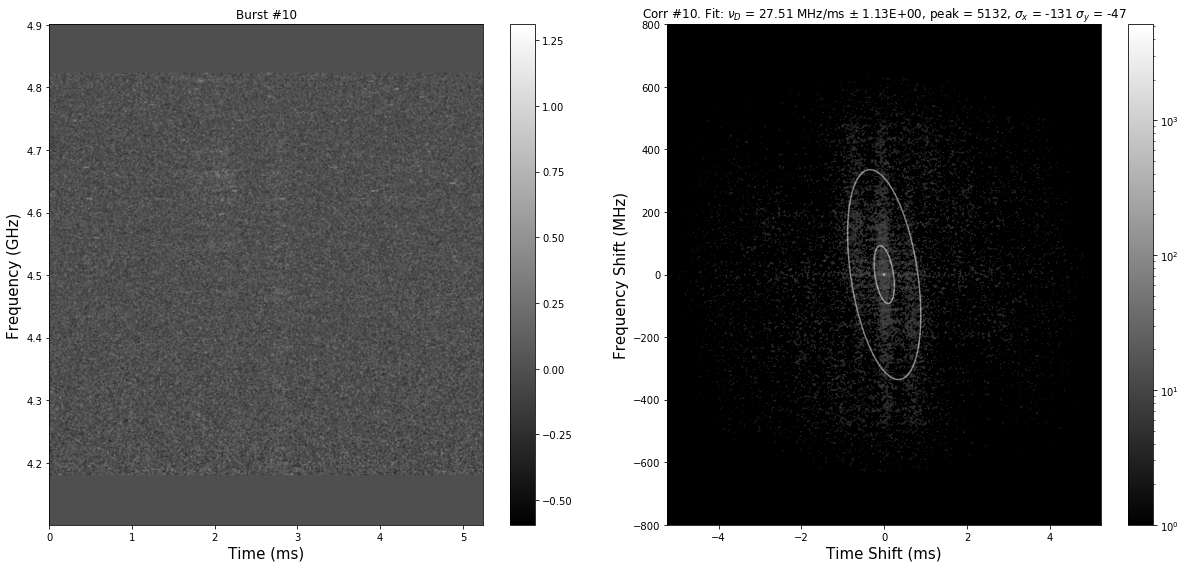

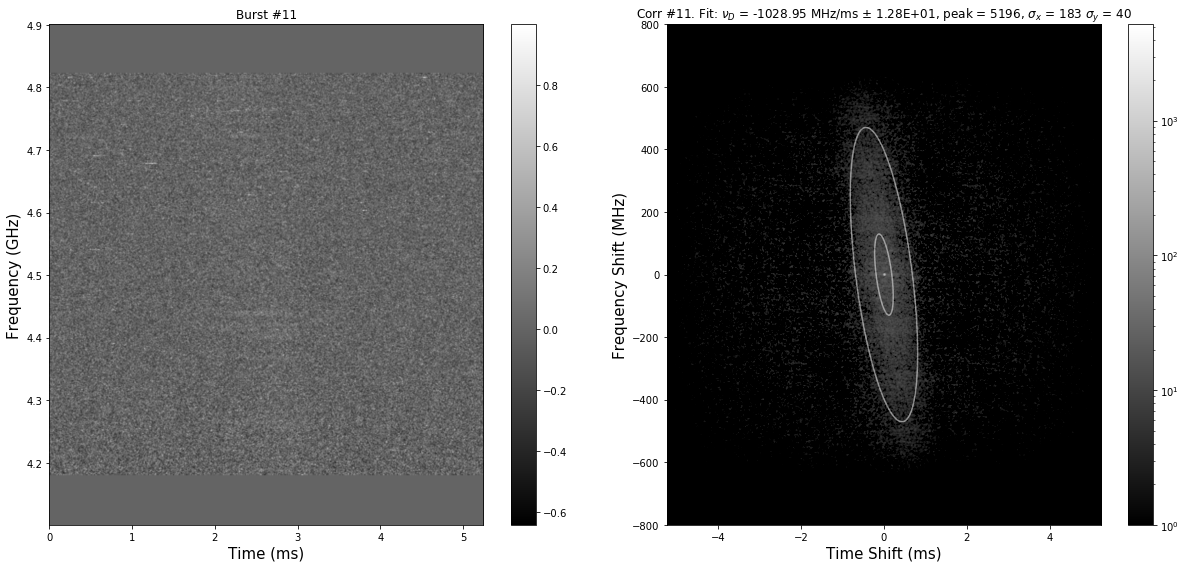

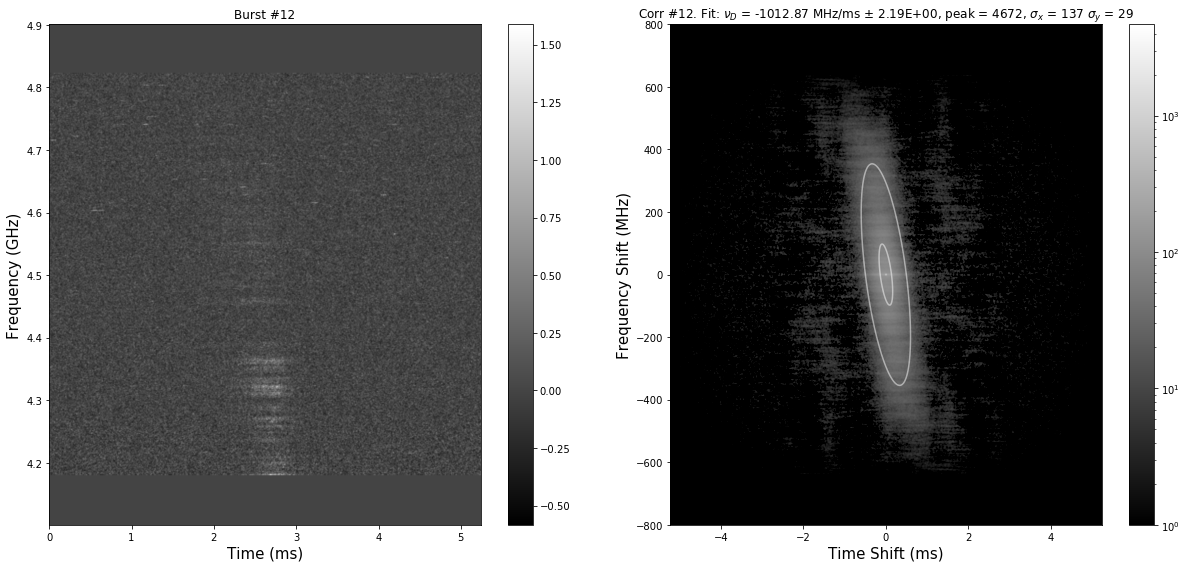

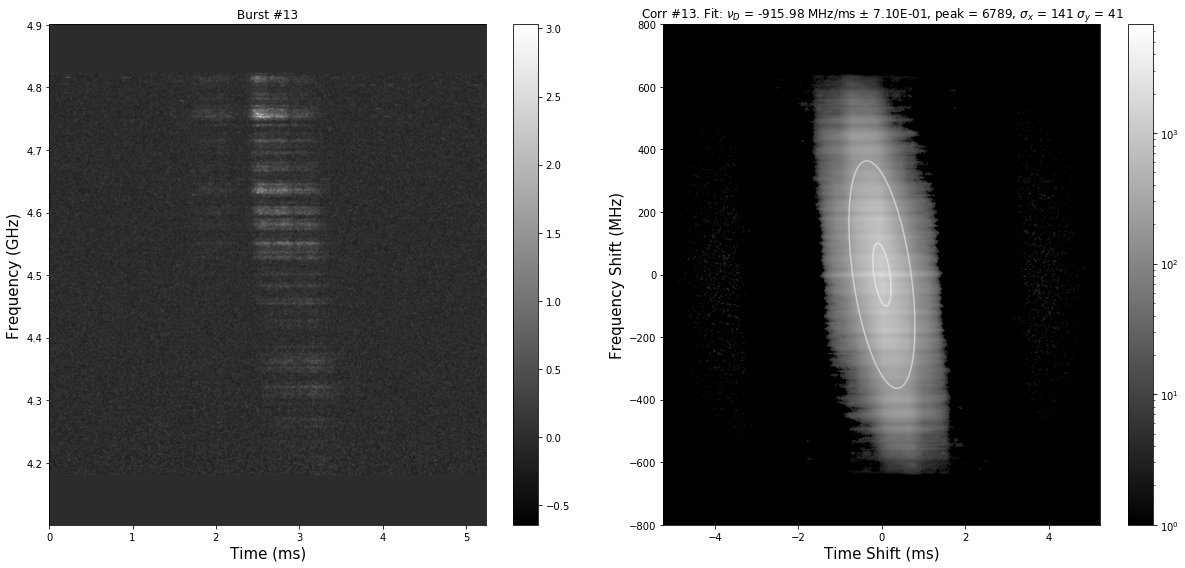

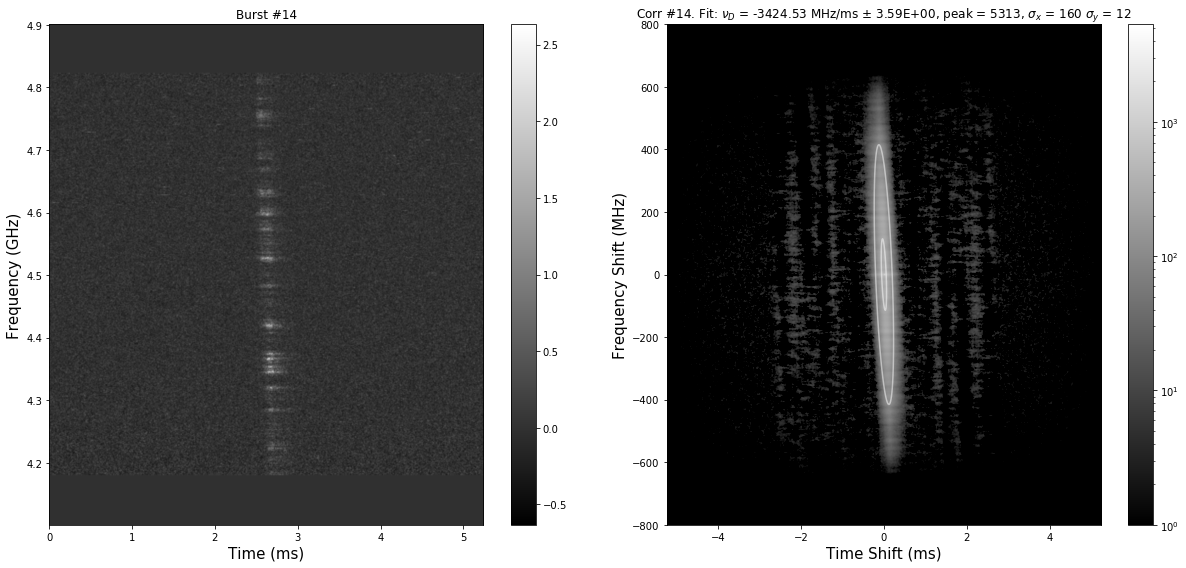

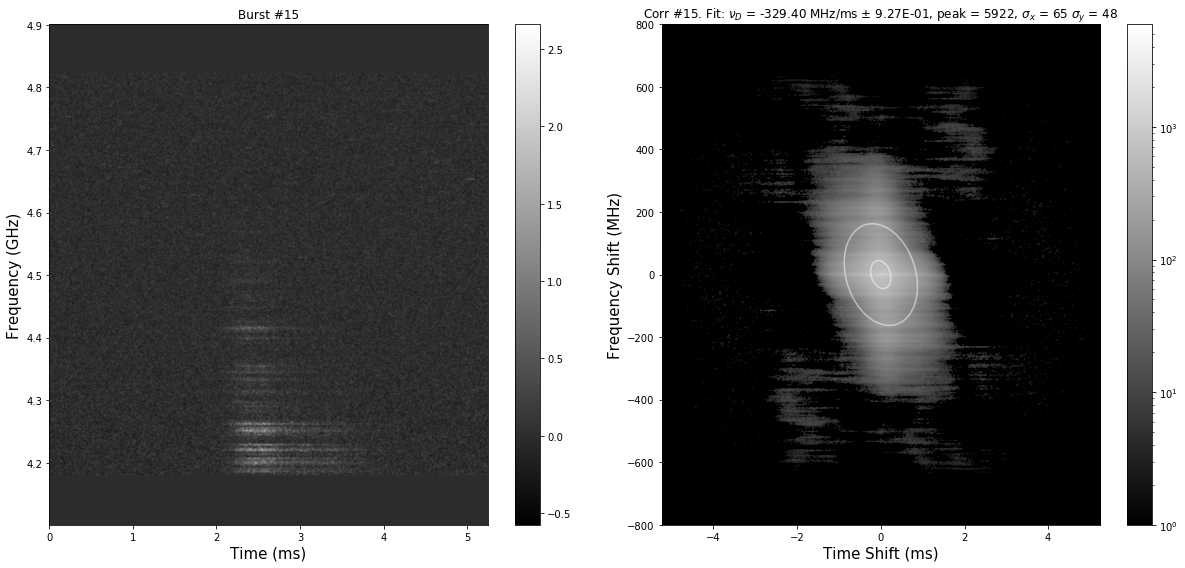

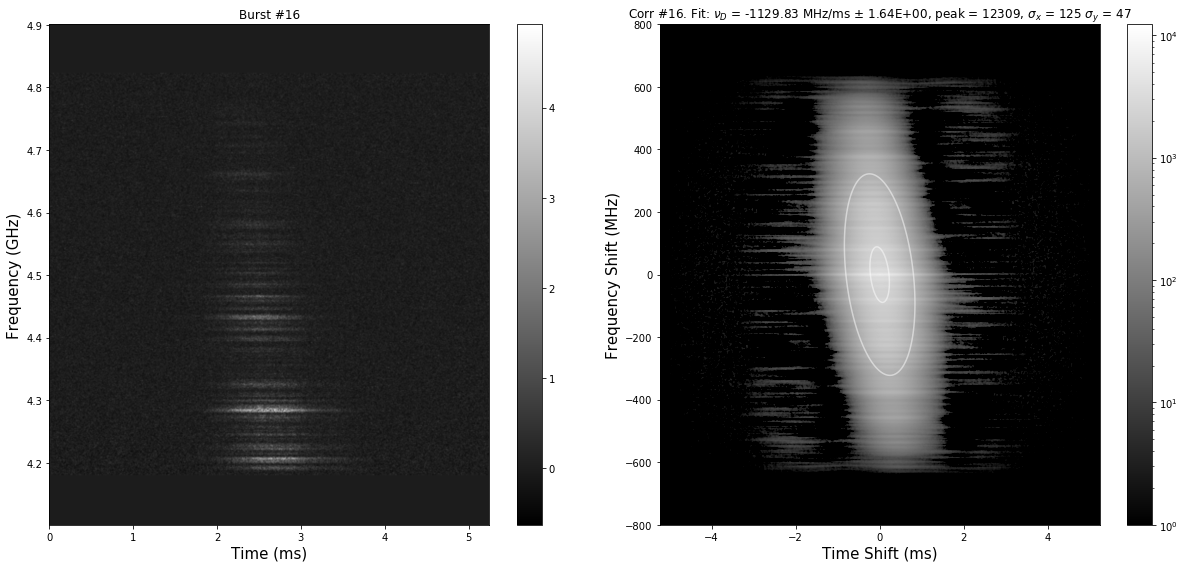

In [2]:
folder = 'data'
outfolder = 'figures'
for burst, filename, edge in tqdm( zip(range(1, len(bursts['filename'])+1), bursts['filename'], bursts['edge']), total=len(bursts['filename']) ):
    print('processing {}'.format(filename))
    if burst < 10:
        continue

    junk, nchan, nbin, I, Q, U, V = np.loadtxt('{}/{}'.format(folder, filename), delimiter=' ', unpack=True)
    Q, U, V = None, None, None
    n = len(junk)
    print("Data loaded")
    
    binmax = int(nbin[n-1])+1
    frequencymax = (int(nchan[n-1])+1)
    intensity = np.zeros((frequencymax, binmax))

    X = np.zeros(binmax)
    Y = np.zeros(frequencymax)

    # what are these?
    tmin = 500 
    tmax = 1500

    #### 1. remove noise
    intensitynoise1 = np.zeros(tmin-1)
    intensitynoise2 = np.zeros(binmax-tmax)
    for i in tqdm(range(frequencymax-50,51,-1), desc='noise removal', disable=True):

        Y[i-1] = 4.15 + (i-1) * 1.5625 # ?

        for j in range(1,tmin) :

            intensitynoise1[j-1] = (I[j-1 + binmax*(frequencymax-i)])/(tmin-1)


        for j in range(tmax+1,binmax+1) :

            intensitynoise2[j-1-tmax] = (I[j-1 + binmax*(frequencymax-i)])/(binmax-tmax)

        a = sum(intensitynoise1)
        b = sum(intensitynoise2)

        for j in range(1,binmax+1) :
            X[j-1] = j-1
            intensity[i-1,j-1] = I[j-1 + binmax*(frequencymax-i)] - (a+b)/2

    #### 2. find autocorrelation 
    burstwindow = intensity[:,edge:edge+frequencymax]

    print("finding auto-correlation...")
    corr = signal.correlate2d(burstwindow, burstwindow, mode='full')
    
    #### 3. Fit Gaussian to autocorrelation
    popt, pcov = fitgaussiannlsq(corr)
    perr = np.sqrt(np.diag(pcov))
    x = range(0, 1023); y = range(0, 1023)
    x, y = np.meshgrid(x, y)
    fitmap2 = twoD_Gaussian((x, y), *popt).reshape(1023, 1023)
    print('solution nlsq:', popt)
    print('parameter 1sigma:', perr)
    
    ### 3.5 Compute drift and error
    theta = popt[-1] if popt[3] > popt[4] else popt[-1] - np.pi/2
    slope = np.tan(theta)
    drift = 1.5625/0.01024 * slope # MHz/ms
    drift_error = (1.5625/0.01024) * (perr[-1] * (1/np.cos(theta))**2)
    print('drift error:', drift_error)
    
    #### 4. Plot
    cmap = plt.get_cmap('gray')
    cmap.set_bad(color = 'k', alpha = 1.) # potentially hides important errors in the data!

    plt.figure(figsize=(17,8))
    plt.subplot(121)
    plt.title("Burst #{}".format(burst))
    burstextents = [0, 
           10.24e-6 * burstwindow.shape[-1] * 1e3, 
           4100.78125 * 1e-3, 
           (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]
    plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
    plt.xlabel("Time (ms)", size=15)
    plt.ylabel("Frequency (GHz)", size=15)
    plt.colorbar()

    plt.subplot(122)
    plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2E}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, drift, drift_error, np.max(corr), popt[3], popt[4]))
    # plt.imshow(corr, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower") # linear scale
    # plt.clim(0, np.max(corr)/2)
    corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
           10.24e-6 * (corr.shape[1]/2) * 1e3 , 
           (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
           ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
    plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1), extent=corrextents)
    plt.xlabel("Time Shift (ms)", size=15)
    plt.ylabel("Frequency Shift (MHz)", size=15)
    plt.colorbar()
    
    plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

    plt.tight_layout()
    plt.savefig('{}/burst_{}_figure.png'.format(outfolder, burst))
    print('saved {}/burst_{}_figure.png'.format(outfolder, burst))

In [ ]:
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('gray')
cmap.set_bad(color = 'k', alpha = 1.)
plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1))
print(np.max(corr), np.min(corr))
# linear cmap
# plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower")
# plt.clim(0, np.max(corr)/2)

plt.colorbar()


In [ ]:
cmap = "gray"
x = range(0, 1023); y = range(0, 1023)
x, y = np.meshgrid(x, y)
# amplitude, xo, yo, sigma_x, sigma_y, theta
testmap = twoD_Gaussian((x, y), *[1.8e+03, 5.11e+02, 5.11e+02, 1.74e+02, 4.7e+01, 1.425]).reshape(1023, 1023)
popt = [1.8e+03, 5.11e+02, 5.11e+02, 1.74e+02, 4.7e+01, 1.425]

plt.figure(figsize=(10,8))
plt.title("Correlation #{}. Fit: $\\theta$ = {:.2f} rad, peak = {:.0f}, $\sigma_x$ = {} $\sigma_y$ = {}".format(burst, popt[-1], 1000, 1, 1))
print(burstwindow.shape)
burstextents = [0, 
           10.24e-6 * burstwindow.shape[-1] * 1e3, 
           4100.78125 * 1e-3, 
           (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]

plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
plt.xlabel("Time (ms)", size=20)
plt.ylabel("Frequency (GHz)", size=20)
plt.colorbar()


In [ ]:
x = range(0, 1023); y = range(0, 1023)
x, y = np.meshgrid(x, y)
popt = [1,2,3,4,5,6]; burst = 1
fitmap2 = twoD_Gaussian((x, y), *popt).reshape(1023, 1023)
drift = 1; perr = 1
cmap = "gray"
plt.figure(figsize=(10,10))
plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2f}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(1,1,1,1,1,1))
# plt.title("TESTCorr #{}. Fit: $\\theta$ = {:.2f}rad, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, popt[-1], np.max(corr), popt[3], popt[4]))
# corrextents = [-10.24e-6 * corr.shape[1] * 1e3 / 2, 
#            10.24e-6 * corr.shape[1] * 1e3 / 2, 
#            (4100.78125 -  (4100.78125 + 1.5625*corr.shape[0]/2) ) * 1e-3, 
#            (4100.78125 +  (4100.78125 + 1.5625*corr.shape[0]/2) ) * 1e-3]
plt.imshow(fitmap2, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1))#, extent=corrextents)
plt.colorbar()
# plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

In [ ]:
corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
           10.24e-6 * (corr.shape[1]/2) * 1e3 , 
           (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
           ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
corrextents